# Inteligência Artificial: Clusterização
## ASSESSMENT – AT

### Questão 1
Avalie o dataset Mall Customer Segmentation Data e, baseando-se no funcionamento do k-means, determine qual(is) o(s) objetivo(s) de uma tarefa de agrupamento para esse conjunto de dados.

In [1]:
import pandas as pd
import kagglehub

# Importando o dataset Mall Customer Segmentation Data
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
mall_customers = pd.read_csv(path + "/Mall_Customers.csv")

# Visualizando as 5 primeiras linhas do dataset
print(mall_customers.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### Questão 2
Escreva um código em python para aplicar o k-means sobre o dataset Mall Customer Segmentation Data. Apresente avalie os resultados obtidos. Em que situações o k-means pode falhar? Explique.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Importando o dataset Mall Customer Segmentation Data
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
mall_customers = pd.read_csv(path + "/Mall_Customers.csv")

# Selecionando as colunas relevantes para clustering
features_col = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
features = mall_customers[features_col]

# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicando o K-Means
RANDOM_STATE = 11
kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)
kmeans.fit(features_scaled)

# Adicionando os clusteres ao DataFrame original
mall_customers["Cluster"] = kmeans.labels_

# Visualizando os centros dos clusters
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features_col)
print(centers_df)

         Age  Annual Income (k$)  Spending Score (1-100)
0  46.250000           26.750000               18.350000
1  32.875000           86.100000               81.525000
2  55.638298           54.382979               48.851064
3  25.185185           41.092593               62.240741
4  39.871795           86.102564               19.358974


### Questão 3
a. Use o k-means para fazer uma quantização vetorial sobre os dados do dataset Mall Customer Segmentation Data. Apresente os resultados.<br>
b. Aplique o PCA para determinar as componentes principais do dataset Mall Customer Segmentation Data. Apresente os resultados.<br>
c. Escreva um código em Python que permita comparar os resultados obtidos nos itens (a) e (b).


Centroides de cada cluster:

         Age  Annual Income (k$)  Spending Score (1-100)
0  46.250000           26.750000               18.350000
1  32.875000           86.100000               81.525000
2  55.638298           54.382979               48.851064
3  25.185185           41.092593               62.240741
4  39.871795           86.102564               19.358974


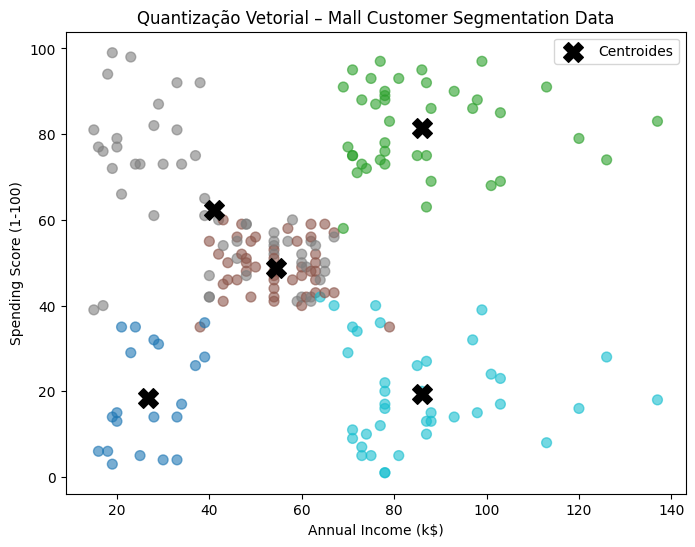

Variância explicada por componente:
PC1: 0.443  (Acumulada: 0.443)
PC2: 0.333  (Acumulada: 0.776)
PC3: 0.224  (Acumulada: 1.000)

Peso de cada variável nos Componetes Principais (PC):
                             PC1       PC2       PC3
Age                     0.706382  0.030141  0.707188
Annual Income (k$)     -0.048024  0.998832  0.005398
Spending Score (1-100) -0.706199 -0.037775  0.707005


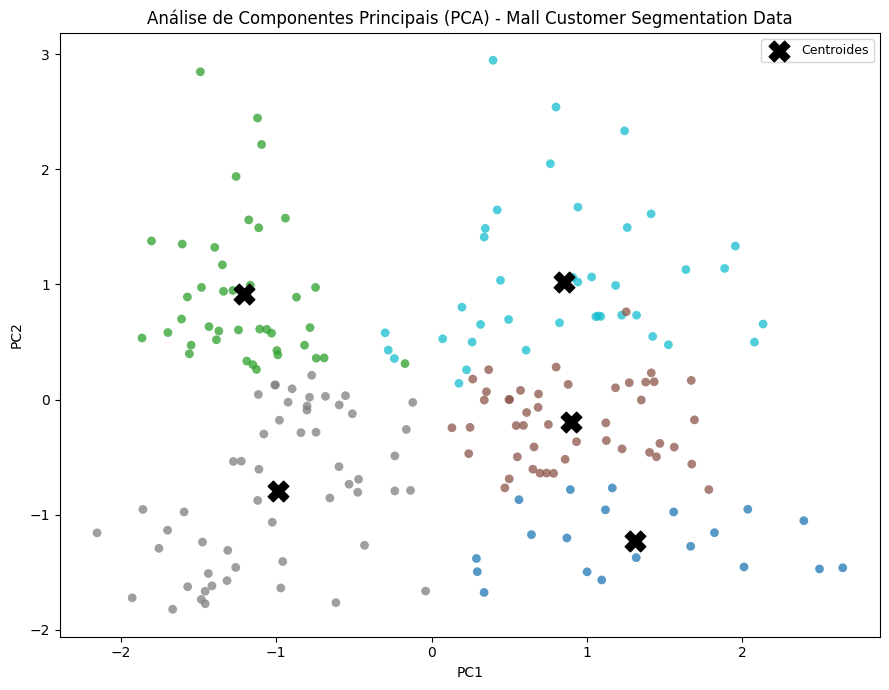

In [3]:
# --------------------------------------------------------------------------------
# Item (a)
# --------------------------------------------------------------------------------
# Mostrando os centróides de cada cluster
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features_col)
print("Centroides de cada cluster:\n")
print(centers_df)

# Representando cada cliente pelo centróide do seu cluster
vq_data = centers_df.loc[mall_customers["Cluster"]].reset_index(drop=True)

# Visualizando os clusters e seus centróides
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(
    mall_customers["Annual Income (k$)"],
    mall_customers["Spending Score (1-100)"],
    c=mall_customers["Cluster"], cmap="tab10", alpha=0.6, s=50
)
plt.scatter(centers_df["Annual Income (k$)"], centers_df["Spending Score (1-100)"], c="black", marker="X", s=200, label="Centroides")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Quantização Vetorial – Mall Customer Segmentation Data")
plt.legend()
plt.show()

# --------------------------------------------------------------------------------
# Item (b)
# --------------------------------------------------------------------------------
# Aplicando PCA para determinar os componentes principais
from sklearn.decomposition import PCA
pca = PCA(n_components=None, random_state=11)
pca.fit(features_scaled)

# Variância explicada por cada componente principal
import numpy as np
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)
print("Variância explicada por componente:")
for i, (var, cum) in enumerate(zip(explained, cum_explained), start=1):
    print(f"PC{i}: {var:.3f}  (Acumulada: {cum:.3f})")

# Calculando o peso de cada variável nos componentes principais
coef = pd.DataFrame(pca.components_.T, index=features_col, columns=[f"PC{i}" for i in range(1, len(features_col)+1)])
print("\nPeso de cada variável nos Componetes Principais (PC):")
print(coef)

# --------------------------------------------------------------------------------
# Item (c)
# --------------------------------------------------------------------------------
# Transformando os dados originais para o espaço PCA(2D)
pca_2d = pca.transform(features_scaled)[:, :2]

# Transformando os centróides dos clusters para o espaço PCA(2D)
cent_pca_2d = pca.transform(kmeans.cluster_centers_)[:, :2]

# Visualizando os clusters e seus centróides no espaço PCA(2D)
plt.figure(figsize=(9, 7))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=mall_customers["Cluster"], cmap="tab10", s=40, alpha=0.75, edgecolor="none")
plt.scatter(cent_pca_2d[:, 0], cent_pca_2d[:, 1], c="black", marker="X", s=220, label="Centroides")
plt.title("Análise de Componentes Principais (PCA) - Mall Customer Segmentation Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="best", fontsize=9)
plt.tight_layout()
plt.show()


### Questão 4
Aplique o Agglomerative Clustering para determinar agrupamentos no dataset Mall Customer Segmentation Data ajustando os parâmetros de linkage para:
- ward
- average
- single
- complete

Em seguida, explique o comportamento do algoritmo para cada método de linkage utilizado.

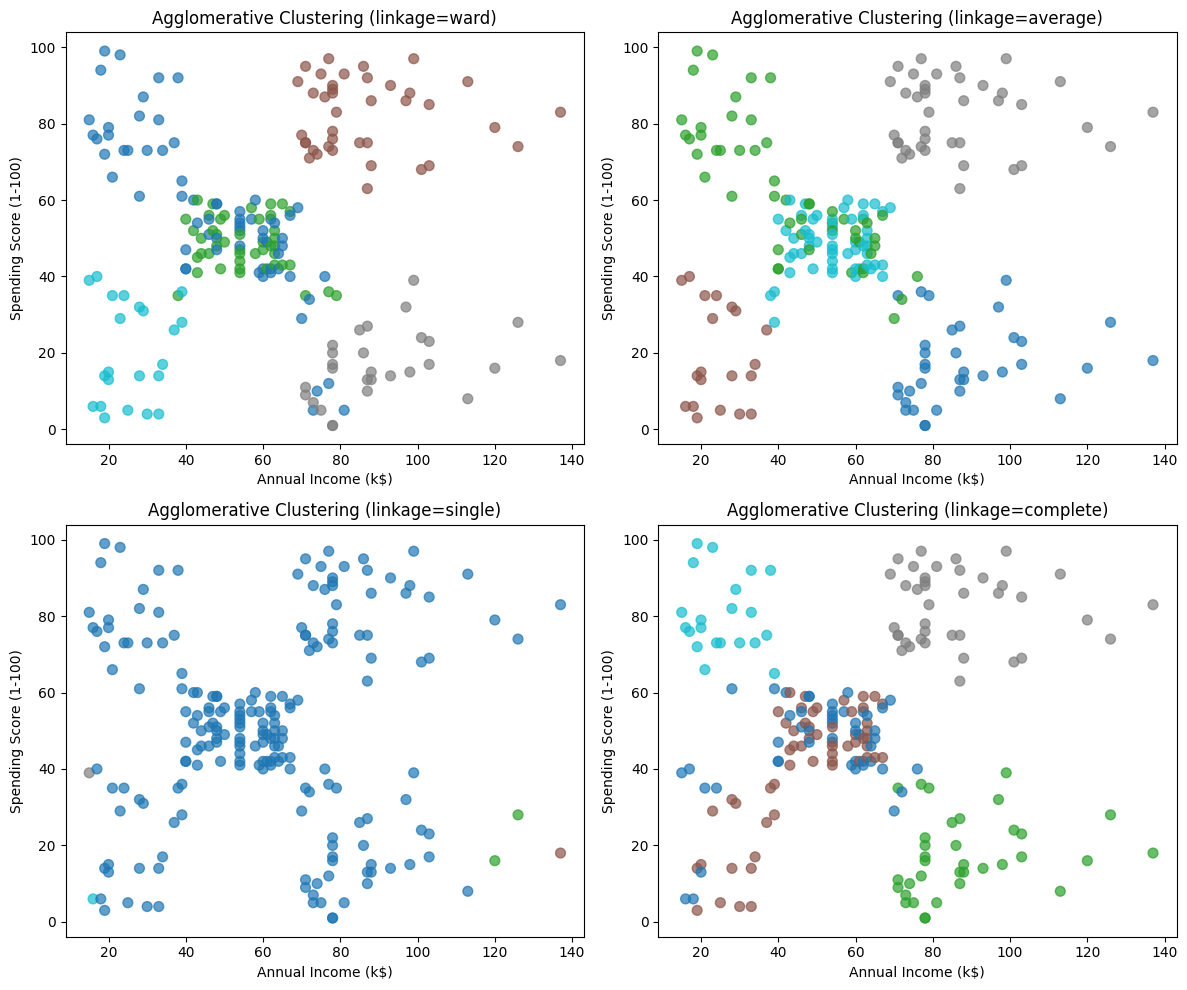

In [4]:
from sklearn.cluster import AgglomerativeClustering

N_CLUSTERS = 5
linkage_methods = ["ward", "average", "single", "complete"]

# Preparando os gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Aplicando o Agglomerative Clustering para cada tipo de linkage
for i, method in enumerate(linkage_methods):
    model = AgglomerativeClustering(n_clusters=N_CLUSTERS, linkage=method)
    
    # Executando o modelo
    labels = model.fit_predict(features_scaled)
    mall_customers[f"Cluster_{method}"] = labels

    # Gerando o gráfico de dispersão
    axes[i].scatter(mall_customers["Annual Income (k$)"], mall_customers["Spending Score (1-100)"],c=labels, cmap="tab10", s=50, alpha=0.7)
    axes[i].set_title(f"Agglomerative Clustering (linkage={method})")
    axes[i].set_xlabel("Annual Income (k$)")
    axes[i].set_ylabel("Spending Score (1-100)")

# Exibindo os gráficos
plt.tight_layout()
plt.show()

### Questão 5
Avalie os resultados obtidos na questão 4 por meio de dendrogramas. Apresente os resultados.


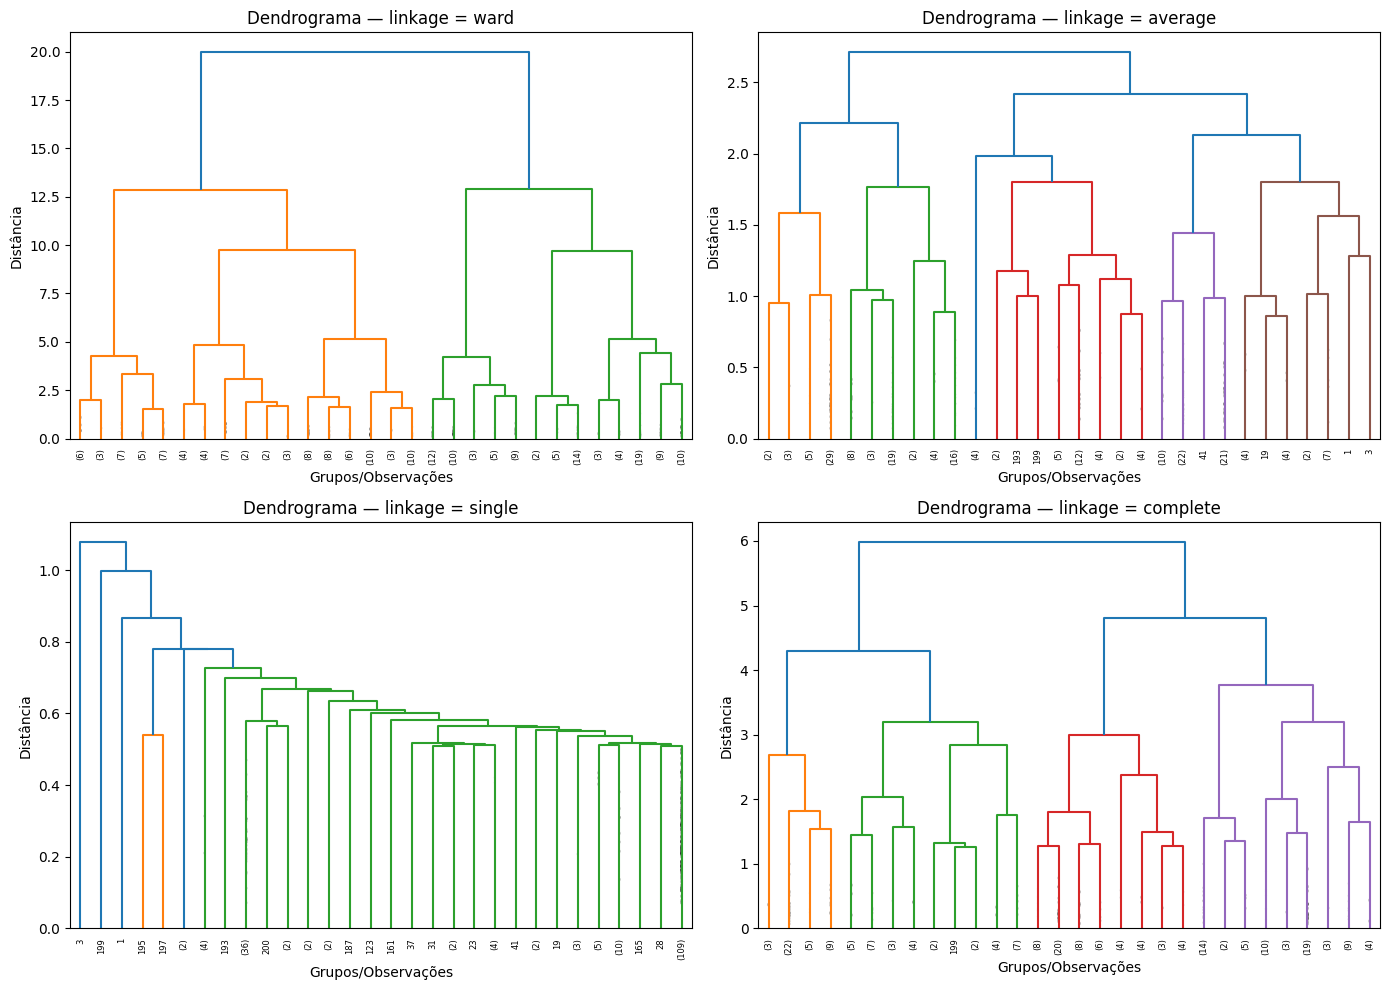

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Preparando os gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
leaf_labels = mall_customers["CustomerID"].astype(str).values

# Criando os dendrogramas para cada método de linkage
for i, method in enumerate(linkage_methods):
    Z = linkage(features_scaled, method=method)

    # Desenhar o dendrograma
    dendrogram(Z, ax=axes[i], labels=leaf_labels, leaf_rotation=90, leaf_font_size=6, truncate_mode="lastp", p=30, show_contracted=True )
    axes[i].set_title(f"Dendrograma — linkage = {method}")
    axes[i].set_xlabel("Grupos/Observações")
    axes[i].set_ylabel("Distância")

# Exibindo os gráficos
plt.tight_layout()
plt.show()

### Questão 6
Associe o dendrograma da questão anterior a um mapa de calor. Apresente os resultados.


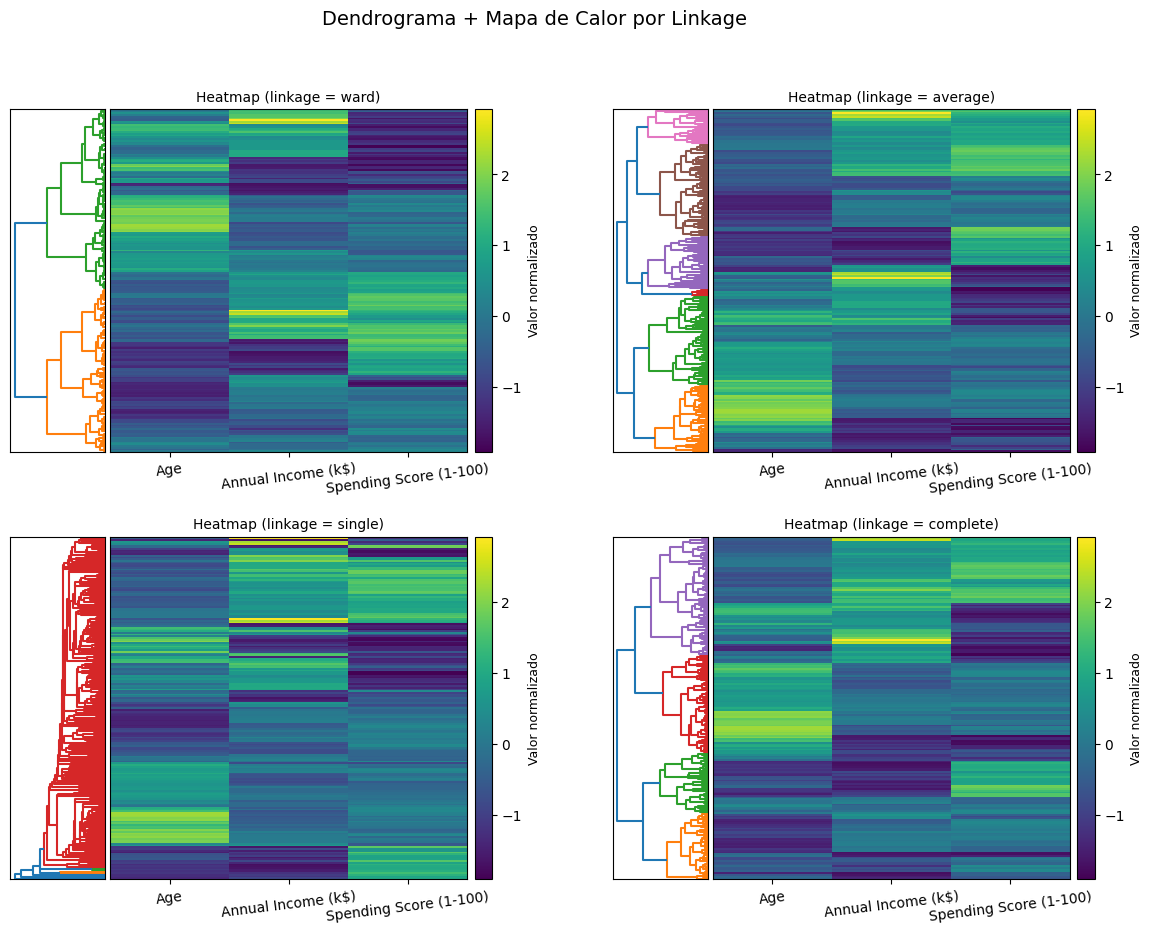

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.cluster.hierarchy import linkage, dendrogram

# Criando o DataFrame (linhas = clientes, colunas = features normalizadas)
features_df = pd.DataFrame(features_scaled, columns=features_col, index=mall_customers.get("CustomerID", mall_customers.index))

# Preparando os gráficos
fig = plt.figure(figsize=(14, 10))
outer = gridspec.GridSpec(2, 2, wspace=0.25, hspace=0.25)

# Criando os dendrogramas + heatmaps para cada método de linkage
for i, method in enumerate(linkage_methods):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[i], width_ratios=[1, 4], wspace=0.02)

    # Gerando o linkage
    Z = linkage(features_df.values, method=method)

    # Gerando a ordem das linhas do heatmap a partir do dendrograma
    d = dendrogram(Z, no_plot=True, labels=features_df.index.astype(str).tolist())
    ordered_idx = d["leaves"]
    X_ord = features_df.iloc[ordered_idx]

    # Dendrograma
    ax_d = plt.subplot(inner[0, 0])
    dendrogram( Z, orientation="left", labels=X_ord.index.astype(str).tolist(), leaf_font_size=6, ax=ax_d, color_threshold=None)
    ax_d.set_xticks([])
    ax_d.set_yticks([])

    # Mapa de calor alinhado à ordem do dendrograma
    ax_h = plt.subplot(inner[0, 1])
    im = ax_h.imshow(X_ord.values, aspect="auto", interpolation="nearest", cmap="viridis" )
    ax_h.set_yticks([])
    ax_h.set_xticks(np.arange(len(features_col)))
    ax_h.set_xticklabels(features_col, rotation=7)
    ax_h.set_title(f"Heatmap (linkage = {method})", fontsize=10)

    # Barra de cores para cada painel
    cbar = plt.colorbar(im, ax=ax_h, fraction=0.046, pad=0.02)
    cbar.set_label("Valor normalizado", fontsize=9)

# Exibindo os gráficos
fig.suptitle("Dendrograma + Mapa de Calor por Linkage", fontsize=14)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

### Questão 7
Aplique o DBSCAN para encontrar agrupamentos no dataset make_swiss_roll. Determine os valores ideais para os parâmetros eps e min_samples do algoritmo. (Você pode comparar os efeitos das variações nos parâmetros nos resultados obtidos pelo DBSCAN usando um heatmap.) Apresente os resultados.


Parâmetros para o melhor Silhouette:
eps=0.40 | min_samples=14.0 | Silhouette=0.148


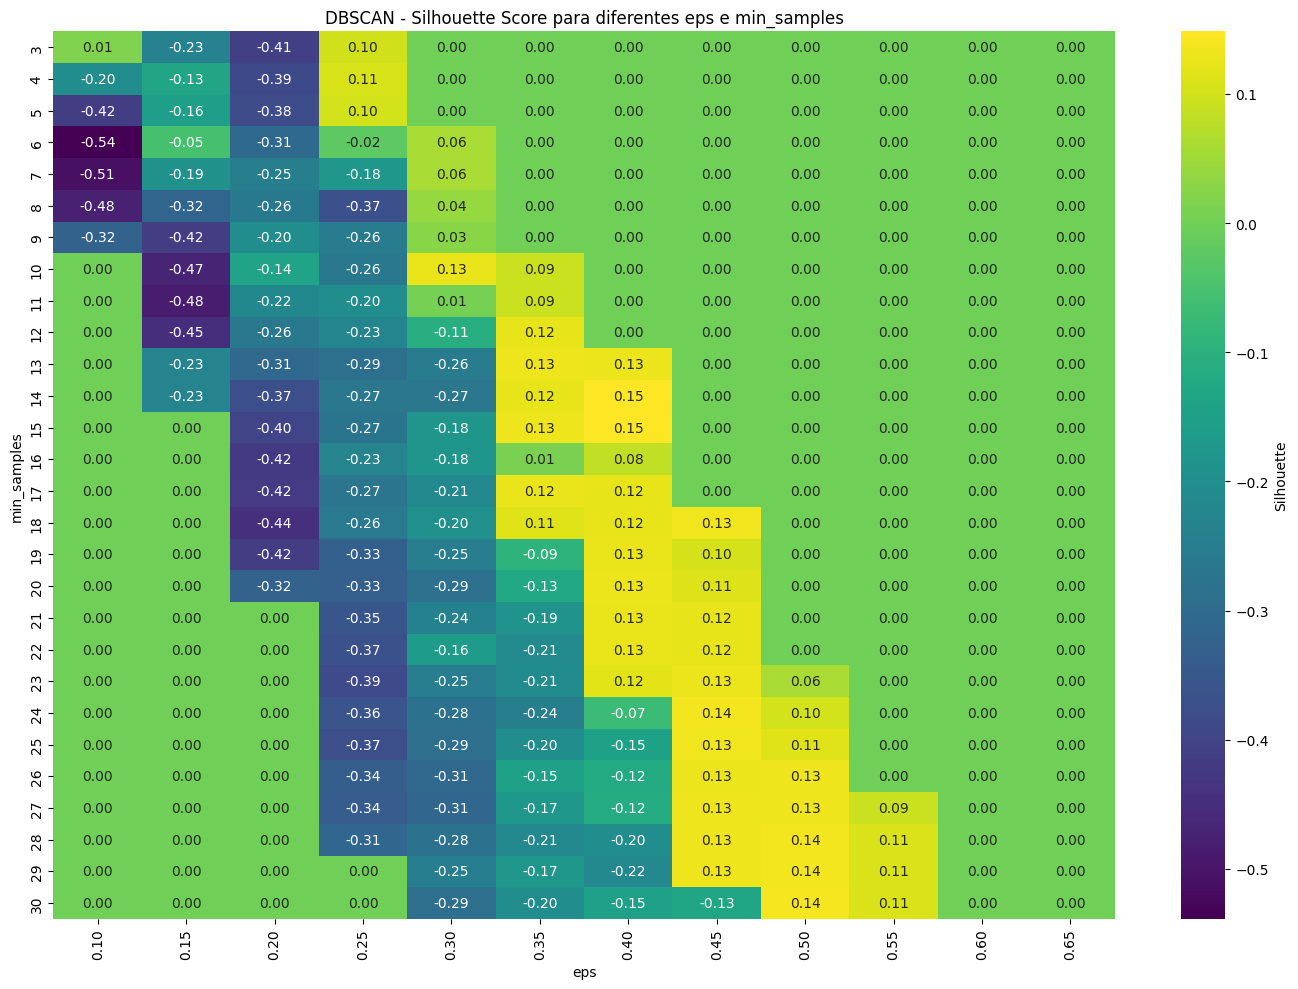

In [7]:
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Gerando o conjunto de dados Swiss Roll
RANDOM_STATE = 11
N_SAMPLES = 2500
features, target = make_swiss_roll(n_samples=N_SAMPLES, noise=0.05, random_state=RANDOM_STATE)

# Normalizando os dados
features_scaled = StandardScaler().fit_transform(features)

# Testando diferentes parâmetros do DBSCAN e calculando o Silhouette
dbscan_results = []
for eps in np.arange(0.1, 0.7, 0.05):
    for min_samples in range(3, 31):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(features_scaled)
        try:
            dbscan_sil = metrics.silhouette_score(features_scaled, dbscan_labels)
        except Exception:
            dbscan_sil = 0
        dbscan_results.append({"eps": eps, "min_samples": min_samples, "Silhouette": dbscan_sil})

# Mostrando os resultados
dbscan_df = pd.DataFrame(dbscan_results)
best_dbscan = dbscan_df.loc[dbscan_df["Silhouette"].idxmax()]
print("Parâmetros para o melhor Silhouette:")
print(f"eps={best_dbscan["eps"]:.2f} | min_samples={best_dbscan["min_samples"]} | Silhouette={best_dbscan["Silhouette"]:.3f}")

# Visualizando os resultados em um mapa de calor
import seaborn as sns
heatmap_data = dbscan_df.pivot(index="min_samples", columns="eps", values="Silhouette")
plt.figure(figsize=(14, 10))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Silhouette'})
ax.set_xticklabels([f"{float(label.get_text()):.2f}" for label in ax.get_xticklabels()])
plt.title("DBSCAN - Silhouette Score para diferentes eps e min_samples")
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.tight_layout()
plt.show()

### Questão 8
Aplique o DBSCAN sobre o dataset Mall Customer Segmentation Data.


In [8]:
# Importando o dataset Mall Customer Segmentation Data
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
mall_customers = pd.read_csv(path + "/Mall_Customers.csv")

# Selecionando as colunas relevantes para clustering
features_col = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
features = mall_customers[features_col]

# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicando o DBSCAN
dbscan_results = []
for eps in np.arange(0.1, 2.5, 0.05):
    for min_samples in range(1, 31):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(features_scaled)
        mall_customers["Cluster_DBSCAN"] = dbscan_labels
        try:
            dbscan_sil = metrics.silhouette_score(features_scaled, dbscan_labels)
        except Exception:
            dbscan_sil = 0
        dbscan_results.append({"eps": eps, "min_samples": min_samples, "Silhouette": dbscan_sil})

# Mostrando os resultados
dbscan_df = pd.DataFrame(dbscan_results)
best_dbscan = dbscan_df.loc[dbscan_df["Silhouette"].idxmax()]
print("Parâmetros para o melhor Silhouette:")
print(f"eps={best_dbscan["eps"]:.2f} | min_samples={best_dbscan["min_samples"]} | Silhouette={best_dbscan["Silhouette"]:.3f}")


Parâmetros para o melhor Silhouette:
eps=1.30 | min_samples=16.0 | Silhouette=0.336


### Questão 9
Compare os resultados obtidos nas questões 2, 4(a) e 8 usando ARI, NMI e silhouette coeficiente.


In [9]:
# Importando o dataset Mall Customer Segmentation Data
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
mall_customers = pd.read_csv(path + "/Mall_Customers.csv")

# Selecionando as colunas relevantes para clustering
features_col = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
features = mall_customers[features_col]

# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicando o K-Means
RANDOM_STATE = 11
kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)
kmeans.fit(features_scaled)
kmeans_silhouette = metrics.silhouette_score(features_scaled, kmeans.labels_)

# Aplicando o Agglomerative Clustering com ward
agglo = AgglomerativeClustering(n_clusters=5, linkage="ward")
agglo_labels = agglo.fit_predict(features_scaled)
agglo_silhouette = metrics.silhouette_score(features_scaled, agglo_labels)

# Aplicando o DBSCAN (utilizando os melhores parâmetros encontrados na questão anterior)
dbscan = DBSCAN(eps=1.3, min_samples=16)
dbscan_labels = dbscan.fit_predict(features_scaled)
dbscan_silhouette = metrics.silhouette_score(features_scaled, dbscan_labels)

# Mostrando os resultados
print("Silhouette Scores:")
print(f"K-Means: {kmeans_silhouette:.3f}")
print(f"Agglomerative (ward): {agglo_silhouette:.3f}")
print(f"DBSCAN: {dbscan_silhouette:.3f}")

Silhouette Scores:
K-Means: 0.417
Agglomerative (ward): 0.390
DBSCAN: 0.336


### Questão 10
Aplique os algoritmos DBSCAN, k-means e Agglometarive Clustering sobre o dataset Olivetti faces. Apresente os resultados.


In [10]:
import kagglehub
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Importando os dados do dataset Olivetti faces
path = kagglehub.dataset_download("sahilyagnik/olivetti-faces")
olivetti_faces = np.load(path + "/olivetti_faces.npy")
olivetti_faces_target = np.load(path + "/olivetti_faces_target.npy")

# Transformando os dados para o uso nos modelos de DBSCAN, K-Means e Agglomerative Clustering
n = olivetti_faces.shape[0]
olivetti_faces = olivetti_faces.reshape(n, -1)

# Normalisando os dados
olivetti_faces = StandardScaler().fit_transform(olivetti_faces)

# Desenvolvendo e avaliando o modelo com o algoritmo DBSCAN
from sklearn.cluster import DBSCAN
print("DBSCAN")
dbscan_results = []
for eps in range(2, 100):
    for min_samples in range(2, 100):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(olivetti_faces)
        dbscan_ari = metrics.adjusted_rand_score(olivetti_faces_target, dbscan_labels)
        dbscan_nmi = metrics.normalized_mutual_info_score(olivetti_faces_target, dbscan_labels)
        try:
            dbscan_sil = metrics.silhouette_score(olivetti_faces, dbscan_labels)
        except ValueError:
            dbscan_sil = np.nan
        dbscan_results.append({"eps": eps, "min_samples": min_samples, "ARI": dbscan_ari, "NMI": dbscan_nmi, "Silhouette": dbscan_sil})
dbscan_df = pd.DataFrame(dbscan_results)
best_dbscan = dbscan_df.loc[dbscan_df["ARI"].idxmax()]
print("Parâmetros para o melhor ARI:")
print(f"eps={best_dbscan["eps"]} | min_samples={best_dbscan["min_samples"]} | ARI={best_dbscan["ARI"]:.3f} | NMI={best_dbscan["NMI"]:.3f} | Silhouette={best_dbscan["Silhouette"]:.3f}")

# Desenvolvendo e avaliando o modelo com o algoritmo K-Means
from sklearn.cluster import KMeans
print("\nK-Means")
RANDOM_STATE = 11
km_results = []
for k in range(2, 400):
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    km_labels = km.fit_predict(olivetti_faces)
    km_ari = metrics.adjusted_rand_score(olivetti_faces_target, km_labels)
    km_nmi = metrics.normalized_mutual_info_score(olivetti_faces_target, km_labels)
    km_sil = metrics.silhouette_score(olivetti_faces, km_labels)
    km_results.append({"k": k, "ARI": km_ari, "NMI": km_nmi, "Silhouette": km_sil})
km_df = pd.DataFrame(km_results)
best_km = km_df.loc[km_df["ARI"].idxmax()]
print("Parâmetro para o melhor ARI:")
print(f"k={best_km["k"]} | ARI={best_km["ARI"]:.3f} | NMI={best_km["NMI"]:.3f} | Silhouette={best_km["Silhouette"]:.3f}")

# Desenvolvendo e avaliando o modelo com o algoritmo Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
print("\nAgglomerative Clustering")
agg_results = []
for k in range(2, 400):
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(olivetti_faces)
    agg_ari = metrics.adjusted_rand_score(olivetti_faces_target, agg_labels)
    agg_nmi = metrics.normalized_mutual_info_score(olivetti_faces_target, agg_labels)
    agg_sil = metrics.silhouette_score(olivetti_faces, agg_labels)
    agg_results.append({"k": k, "ARI": agg_ari, "NMI": agg_nmi, "Silhouette": agg_sil})
agg_df = pd.DataFrame(agg_results)
best_agg = agg_df.loc[agg_df["ARI"].idxmax()]
print("Parâmetro para o melhor ARI:")
print(f"k={int(best_agg["k"])} | ARI={best_agg["ARI"]:.3f} | NMI={best_agg["NMI"]:.3f} | Silhouette={best_agg["Silhouette"]:.3f}")

DBSCAN
Parâmetros para o melhor ARI:
eps=45.0 | min_samples=2.0 | ARI=0.236 | NMI=0.771 | Silhouette=0.126

K-Means
Parâmetro para o melhor ARI:
k=80.0 | ARI=0.517 | NMI=0.848 | Silhouette=0.198

Agglomerative Clustering
Parâmetro para o melhor ARI:
k=58 | ARI=0.618 | NMI=0.867 | Silhouette=0.195


### Questão 11
a.	Aplique o k-means sobre o dataset 20newsgroups. Apresente seus resultados.<br>
b.	Determine tópicos no dataset 20newsgroup usando o algoritmo NMF. Apresente seus resultados.<br>
c.	Determine tópicos no dataset 20newsgroup usando o algoritmo LDA. Apresente seus resultados.


In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn import metrics

# Carregando o dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))

# --------------------------------------------------------------------------------
# Item (a)
# --------------------------------------------------------------------------------

# Transformando os dados textuais em uma matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
features = vectorizer.fit_transform(newsgroups.data)
target = newsgroups.target

# Desenvolvendo e avaliando o modelo com o algoritmo K-Means
RANDOM_STATE = 11
km_results = []
for k in range(5, 20):
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    km_labels = km.fit_predict(features)
    km_ari = metrics.adjusted_rand_score(target, km_labels)
    km_nmi = metrics.normalized_mutual_info_score(target, km_labels)
    try:
        km_sil = metrics.silhouette_score(features, km_labels)
    except ValueError:
        km_sil = np.nan
    km_results.append({"k": k, "ARI": km_ari, "NMI": km_nmi, "Silhouette": km_sil})

# Aprentando o melhor resultado
km_df = pd.DataFrame(km_results)
best_km = km_df.loc[km_df["ARI"].idxmax()]
print("Parâmetro para o melhor ARI:")
print(f"k={best_km["k"]} | ARI={best_km["ARI"]:.3f} | NMI={best_km["NMI"]:.3f} | Silhouette={best_km["Silhouette"]:.3f}")

# --------------------------------------------------------------------------------
# Item (b)
# --------------------------------------------------------------------------------

# Desenvolvendo o modelo com o algoritmo NMF
N_TOPICS = 20
TOP_N = 15
nmf = NMF(n_components=N_TOPICS, random_state=RANDOM_STATE)
nmf_features = nmf.fit_transform(features)
nmf_components = nmf.components_
feature_names = vectorizer.get_feature_names_out()

# Apresentando os tópicos extraídos pelo NMF
print("\nTópicos extraídos pelo NMF:")
for t in range(N_TOPICS):
    top_idx = np.argsort(nmf_components[t])[::-1][:TOP_N]
    top_terms = [feature_names[i] for i in top_idx]
    print(f"Tópico {t:02d}: {", ".join(top_terms)}")

# --------------------------------------------------------------------------------
# Item (c)
# --------------------------------------------------------------------------------

# Desenvolvendo o modelo com o algoritmo LDA
vectorizer = CountVectorizer(stop_words="english")
features = vectorizer.fit_transform(newsgroups.data)
target = newsgroups.target
lda = LatentDirichletAllocation(n_components=N_TOPICS, random_state=RANDOM_STATE)
lda_features = lda.fit_transform(features)
lda_components = lda.components_

# Apresentando os tópicos extraídos pelo LDA
print("\nTópicos extraídos pelo LDA:")
for t in range(N_TOPICS):
    top_idx = np.argsort(lda_components[t])[::-1][:TOP_N]
    top_terms = [feature_names[i] for i in top_idx]
    print(f"Tópico {t:02d}: {", ".join(top_terms)}")

Parâmetro para o melhor ARI:
k=7.0 | ARI=0.046 | NMI=0.249 | Silhouette=0.006

Tópicos extraídos pelo NMF:
Tópico 00: people, don, think, say, want, right, believe, make, religion, true, agree, point, read, life, wrong
Tópico 01: window, problem, server, application, motif, manager, use, using, display, running, screen, set, mouse, xterm, widget
Tópico 02: god, jesus, bible, christ, faith, believe, sin, christian, christians, church, lord, heaven, life, man, love
Tópico 03: drive, disk, hard, drives, floppy, ide, controller, meg, boot, cd, external, internal, problem, bios, hd
Tópico 04: key, chip, encryption, clipper, keys, escrow, government, algorithm, phone, use, nsa, security, des, secure, number
Tópico 05: thanks, mail, advance, hi, looking, info, address, email, send, list, information, help, post, appreciated, interested
Tópico 06: team, year, players, season, win, player, league, play, good, teams, better, years, nhl, best, hockey
Tópico 07: 00, 10, 50, sale, 20, 15, 25, shipp

### Questão 12
Aplique o algoritmo t-SNE sobre o MNIST dataset. Apresente os resultados obtidos.


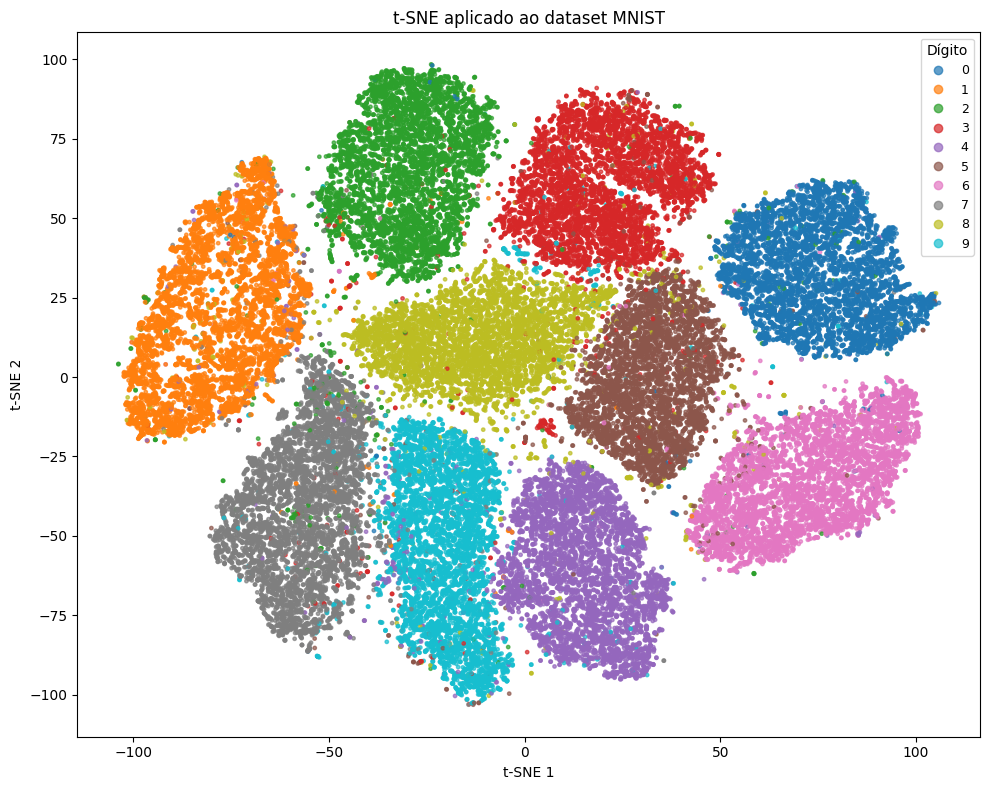

In [12]:
import kagglehub
import idx2numpy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Carregando o dataset MNIST
path = kagglehub.dataset_download("hojjatk/mnist-dataset")
feature_train = idx2numpy.convert_from_file(path + "/train-images.idx3-ubyte")
feature_test = idx2numpy.convert_from_file(path + "/t10k-images.idx3-ubyte")
target_train = idx2numpy.convert_from_file(path + "/train-labels.idx1-ubyte")
target_test = idx2numpy.convert_from_file(path + "/t10k-labels.idx1-ubyte")

# Aplicando o t-SNE para redução de dimensionalidade
RANDOM_STATE = 11
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
feature_tsne = tsne.fit_transform(feature_train.reshape(len(feature_train), -1))
target_sample = target_train.astype(int)

# Visualizando os resultados do t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(feature_tsne[:, 0], feature_tsne[:, 1], c=target_sample, s=6, cmap="tab10", alpha=0.7)
plt.title("t-SNE aplicado ao dataset MNIST")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
handles, _ = scatter.legend_elements(prop="colors", num=10)
plt.legend(handles, [str(i) for i in range(10)], title="Dígito", loc="best", fontsize=9)
plt.tight_layout()
plt.show()